<a href="https://colab.research.google.com/github/WYSTANich/PDA_sol-/blob/main/hw_4_visualisation_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашная работа 3. Визуальный анализ.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература

- [Галерея графиков Matplotlib](https://matplotlib.org/gallery/index.html)
- [Галерея графиков Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Открытый курс машинного обучения. Тема 2: Визуализация данных c Python](https://habr.com/company/ods/blog/323210/)

In [19]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import math
%matplotlib inline

## Визуальный анализ данных

В этом задании вам предлагается провести визуальный анализ датасета о прокатах велосипедов https://www.kaggle.com/c/bike-sharing-demand/data. Оригинальная задача предполагает построение модели предсказания количества прокатов в городе в зависимости от погоды.

Для каждого дня проката известны следующие признаки (как они были указаны в источнике данных):
- season: 1 - весна, 2 - лето, 3 - осень, 4 - зима
- yr: 0 - 2011, 1 - 2012
- mnth: от 1 до 12
- holiday: 0 - нет праздника, 1 - есть праздник
- weekday: от 0 до 6
- workingday: 0 - нерабочий день, 1 - рабочий день
- weathersit: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
- temp: температура в Цельсиях
- atemp: температура по ощущениям в Цельсиях
- hum: влажность
- windspeed(mph): скорость ветра в милях в час
- windspeed(ms): скорость ветра в метрах в секунду
- cnt: количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)

Загрузите с помощью pandas файл `bikes_rent.csv.gz` и выведите первые 5 строк. Ознакомьтесь с данными с помощью функций describe и info.

In [29]:
df = pd.read_csv('/bikes_rent.csv')
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          731 non-null    int64  
 1   yr              731 non-null    int64  
 2   mnth            731 non-null    int64  
 3   holiday         731 non-null    int64  
 4   weekday         731 non-null    int64  
 5   workingday      731 non-null    int64  
 6   weathersit      731 non-null    int64  
 7   temp            731 non-null    float64
 8   atemp           731 non-null    float64
 9   hum             731 non-null    float64
 10  windspeed(mph)  731 non-null    float64
 11  windspeed(ms)   731 non-null    float64
 12  cnt             731 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 74.4 KB


Давайте посмотрим на графиках, как целевой признак зависит количество прокатов (cnt) зависит от остальных признаков `df.columns[:-1]`.

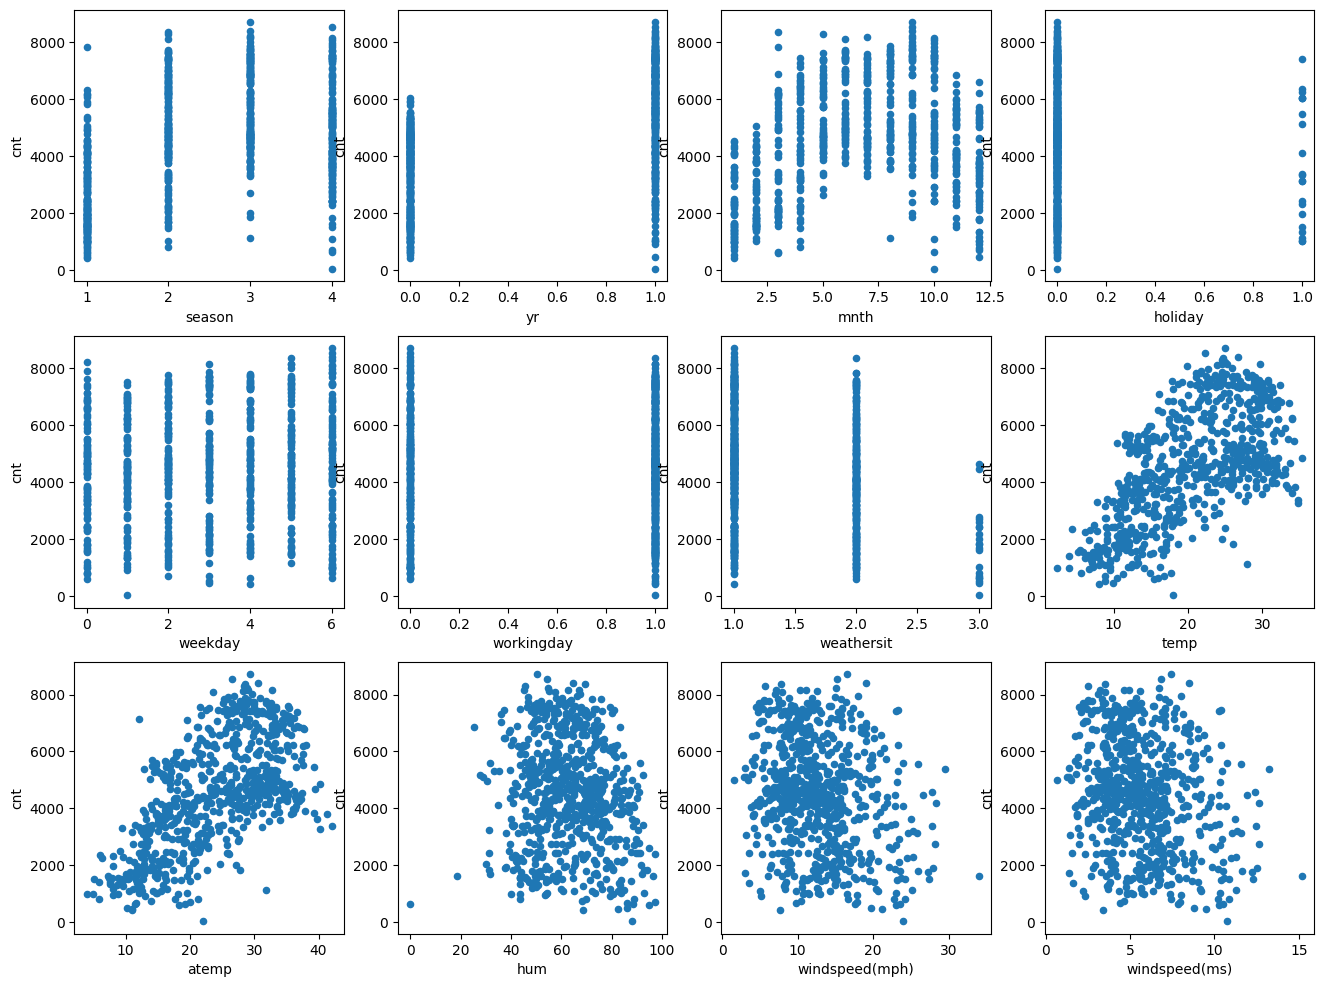

In [33]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
for idx, feature in enumerate(df.columns[:-1]):
     df.plot(feature, "cnt", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

## 1. Ответьте на вопросы:

#### Каков характер зависимости числа прокатов от месяца?

ответ: Зависимость числа прокатов от месяца может имеет сезонный характер

#### Укажите один или два признака, от которых число прокатов скорее всего зависит линейно
_(чем больше значение, тем больше прокатов или наоборот, например)_

Можете проверить результат с помощью lnplot.

ответ: Можно предположить, что температура (temp) и температура по ощущениям (atemp) могут быть признаками, от которых число прокатов зависит линейно

<Figure size 1000x600 with 0 Axes>

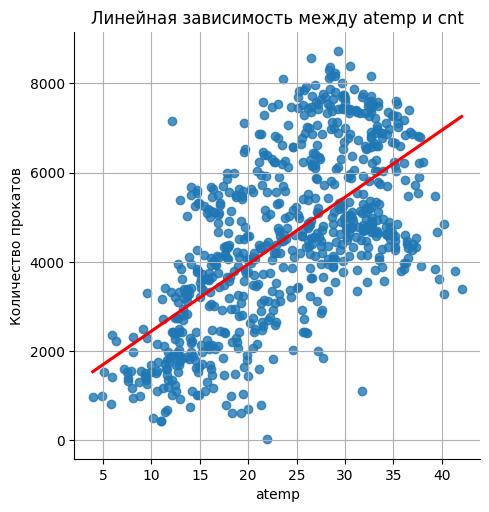

In [34]:
plt.figure(figsize=(10, 6))
sns.lmplot(x='atemp', y='cnt', data=df, ci=None, line_kws={'color': 'red'})
plt.title('Линейная зависимость между atemp и cnt')
plt.xlabel('atemp')
plt.ylabel('Количество прокатов')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

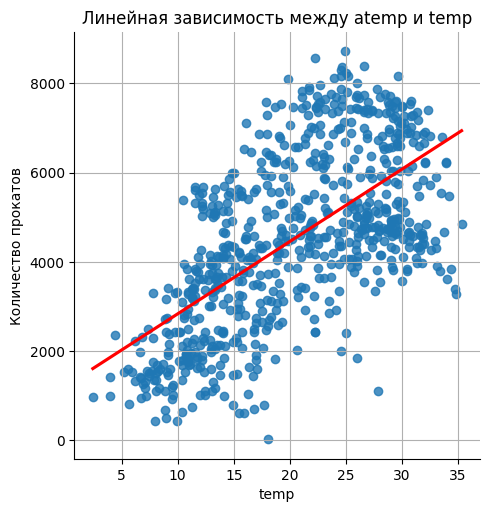

In [35]:
plt.figure(figsize=(10, 6))
sns.lmplot(x='temp', y='cnt', data=df, ci=None, line_kws={'color': 'red'})
plt.title('Линейная зависимость между atemp и temp')
plt.xlabel('temp')
plt.ylabel('Количество прокатов')
plt.grid(True)
plt.show()

## 2. Корреляционная матрица

Напомним, что корреляция отражает взаимосвязь двух случайных величин. Она бывает положительная и отрицательная. Чем ближе коэффициент корреляции к нулю, тем меньше взаимосвязь. Чем больше абсолютная корреляци, тем взаимосвязь больше.

Постройте heatmap корреляционной матрицы. Матрица формируется средствами pandas, со стандартным значением параметров.

**Ответьте на вопрос**: с какими признаками количество прокатов коррелирует меньше всего (около 4 штуки). А с какими больше всего?

Ответ Меньшая корреляция с workingday, weekday, holiday, hum. Большая корреляция с atemp, temp, yr, season.

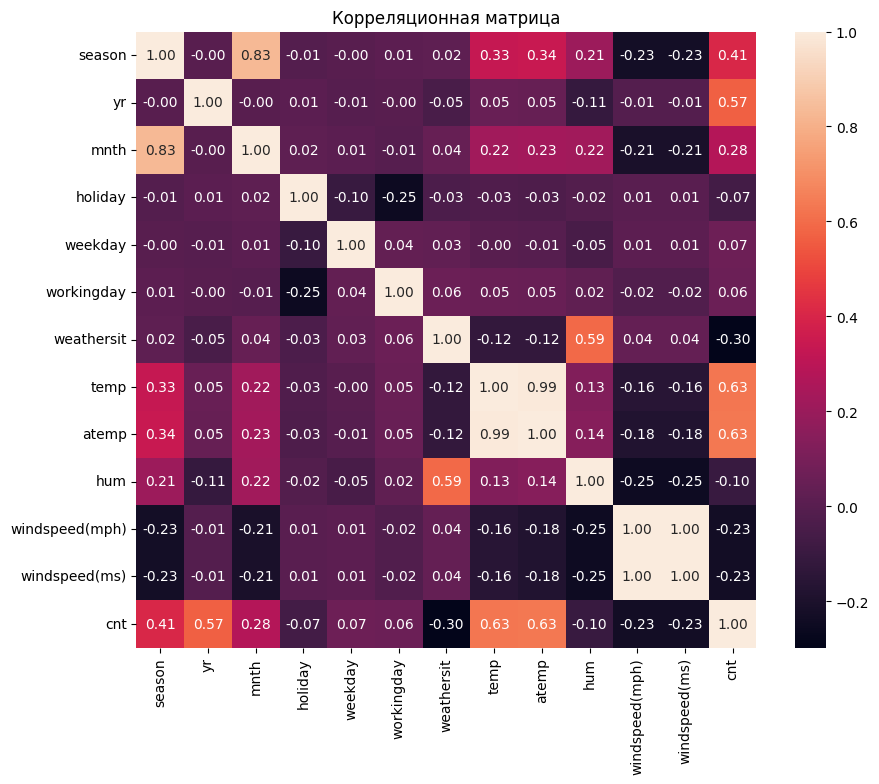

In [37]:
matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, fmt=".2f")
plt.title("Корреляционная матрица")
plt.show()

## 3. Barpot

Постройте Bar-график суммарного количества прокатов велосипедов по месяцам за каждый год одновременно. (будет 24 столбика)

**Ответьте на вопрос:** почему в предыдущем графике была такая большая корреляция между количеством прокатов и годом?

Ответ:Велопрокат становится более популярным и распространенным с течением времени, количество прокатов может увеличиваться с каждым годом.

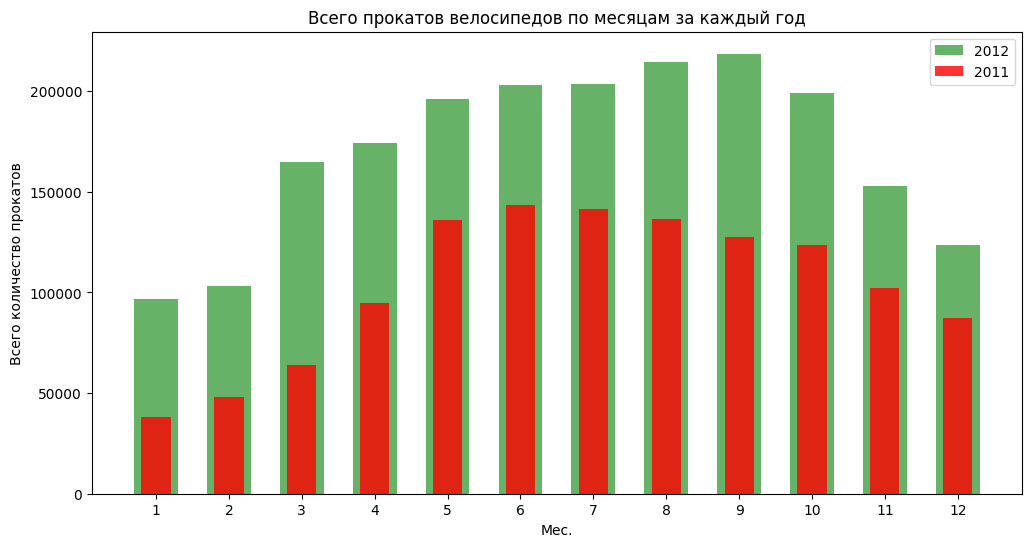

In [41]:
month_rents = df.groupby(['yr', 'mnth'])['cnt'].sum()
month_rents.reset_index().head(15)
year_2011 = month_rents[0]
year_2012 = month_rents[1]
months = range(1, 13)
plt.figure(figsize=(12, 6))
plt.bar(months, year_2012, width=0.6, label='2012', align='center', alpha=0.6, color='green')
plt.bar(months, year_2011, width=0.4, label='2011', align='center', alpha=0.8, color='red')
plt.xticks(months)
plt.xlabel('Мес.')
plt.ylabel('Всего количество прокатов')
plt.title('Всего прокатов велосипедов по месяцам за каждый год')
plt.legend(loc='upper right')
plt.show()

## 4. Countplot

Постройте countplot диаграммы для признаков `weekday`, `weathersit`,

**Ответьте на вопрос:** что вы можете сказать о том, как формировался этот датасет.

**Ответьте на вопрос:** как называется распределение значений признака `weekday`?

Ответ: Можно предположить, что датасет был собран для анализа проката велосипедов в городе. Вероятно, данные были собраны на протяжении нескольких лет с учетом различных факторов, таких как временные, погодные и экономические условия.
    
Ответ: Распределение значений признака weekday называется "равномерным" или "дискретным равномерным". В этом случае, каждый день недели имеет равную вероятность быть выбранным, и значения распределены равномерно по всем дням недели.

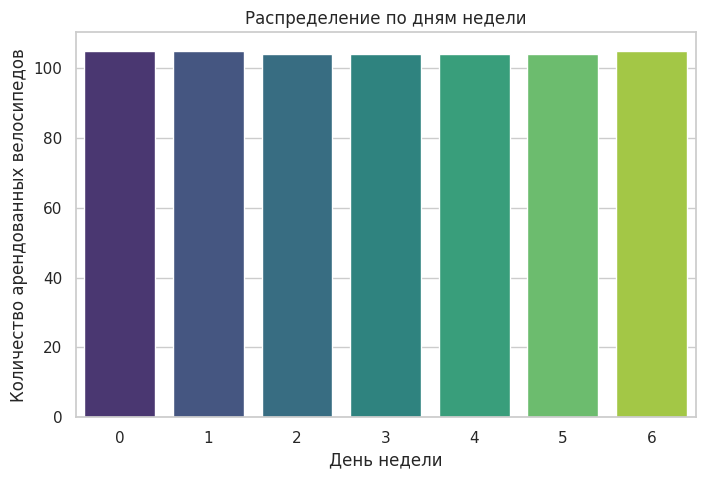

In [47]:
plt.figure(figsize=(8, 5))
sns.countplot(x='weekday', data=df, palette='viridis')
plt.title('Распределение по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество арендованных велосипедов')
plt.show()

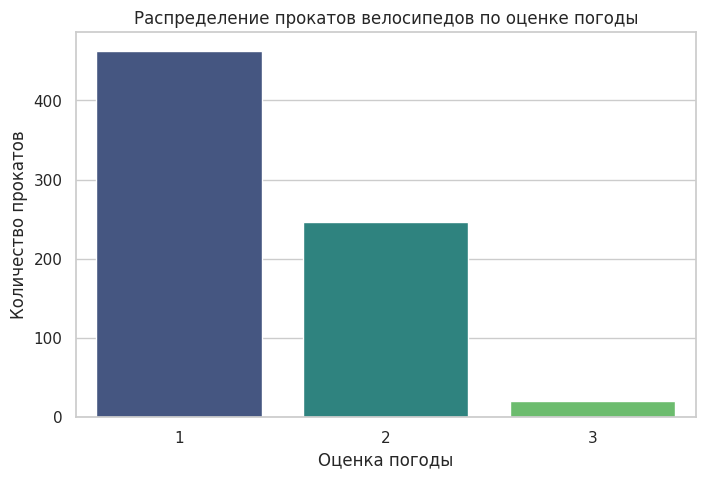

In [48]:
plt.figure(figsize=(8, 5))
sns.countplot(x='weathersit', data=df, palette='viridis')
plt.title('Распределение прокатов велосипедов по оценке погоды')
plt.xlabel('Оценка погоды')
plt.ylabel('Количество прокатов')
plt.show()

## 5. Распределение

Постройте распределение целевого признака.

**Ответьте на вопрос:** основываясь на графике, сколько приблизительно в среднем прокатов бывает в день?

**Ответьте на вопрос:** Как называется полученное распределение?.

Ответ: 4тыс. в день.

Ответ: Нормальное распределение.

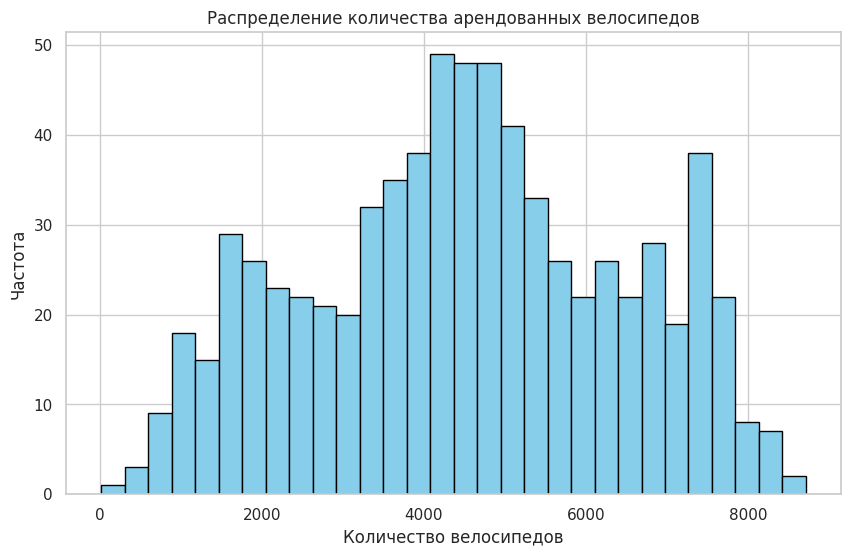

In [49]:
plt.figure(figsize=(10, 6))
plt.hist(df['cnt'], bins=30, edgecolor='black', color='skyblue')
plt.title('Распределение количества арендованных велосипедов')
plt.xlabel('Количество велосипедов')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

## 6. Совместное распределение признаков

Постройте график совместного распределения признаков температура и ощущение температуры.

**Ответьте на вопрос:** вас в этом графике ничего не настораживает? Почему?

Ответ: Местами имеются большие различия, возникает вопрос качества собранных данных.

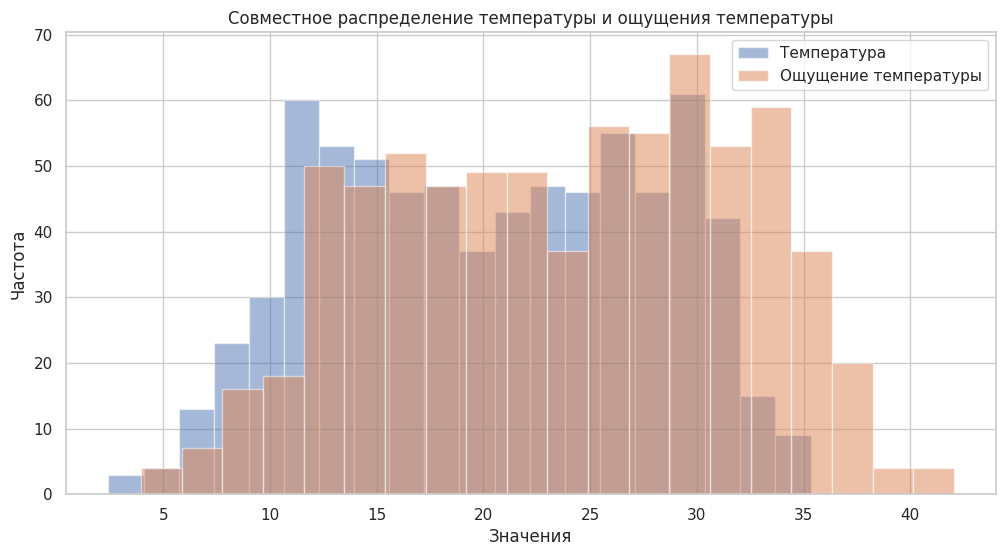

In [52]:
plt.figure(figsize=(12, 6))
plt.hist(df['temp'], bins=20, alpha=0.5, label='Температура')
plt.hist(df['atemp'], bins=20, alpha=0.5, label='Ощущение температуры')
plt.title('Совместное распределение температуры и ощущения температуры')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.grid(True)
plt.legend()
plt.show()

## 7. Ящик с усами

Нарисуйте сами для распределения количества прокатов велосипедов по месяцам в зависимости от того рабочий это день или нет.

**Ответьте на вопрос:** почему в некоторых месяцах чаще берут велосипеды в будний день, а в некоторые - в выходной.


Ответ:

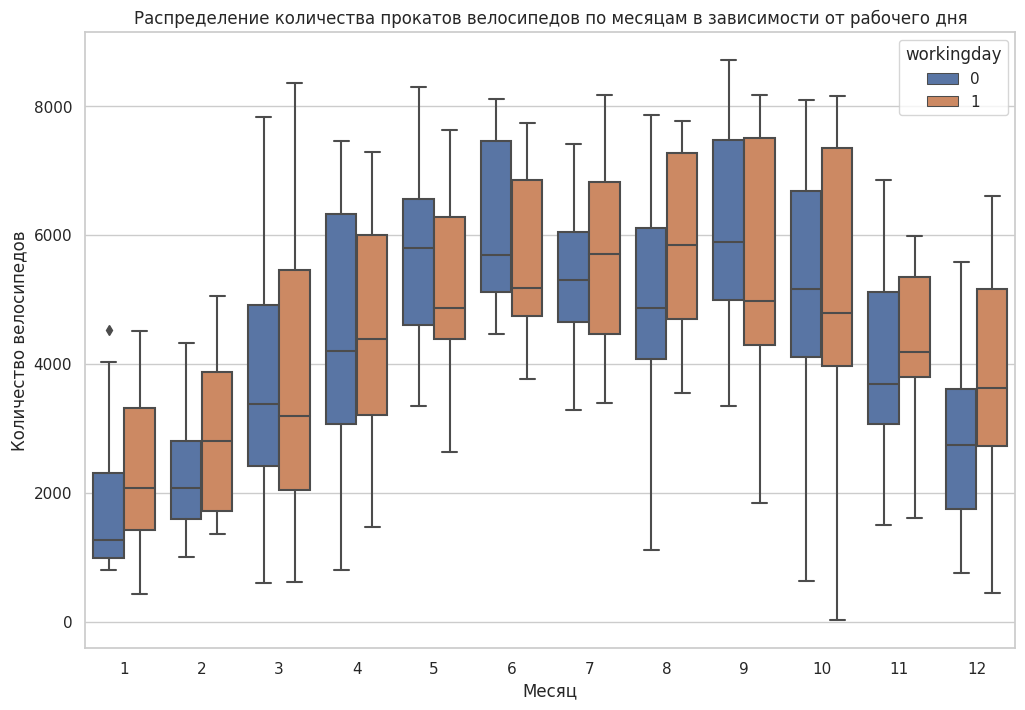

In [59]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='mnth', y='cnt', hue='workingday', data=df)
plt.title('Распределение количества прокатов велосипедов по месяцам в зависимости от рабочего дня')
plt.xlabel('Месяц')
plt.ylabel('Количество велосипедов')
plt.show()

## 8. Хитрый вопрос

Правда ли, что при более сильном ветре человеку ощущается, что на улице холодне, чем на самом деле? Нарисуйте график, подтверждающий или опровергающий эту гипотезу. Обоснуйте. Возможно, вам придется создать новый признак.

Рассуждение: При более сильном ветре человек может ощущать, что на улице холоднее, чем на самом деле. Это объясняется ветром, который усиливает ощущение холода на коже при взаимодействии ветра с телом.

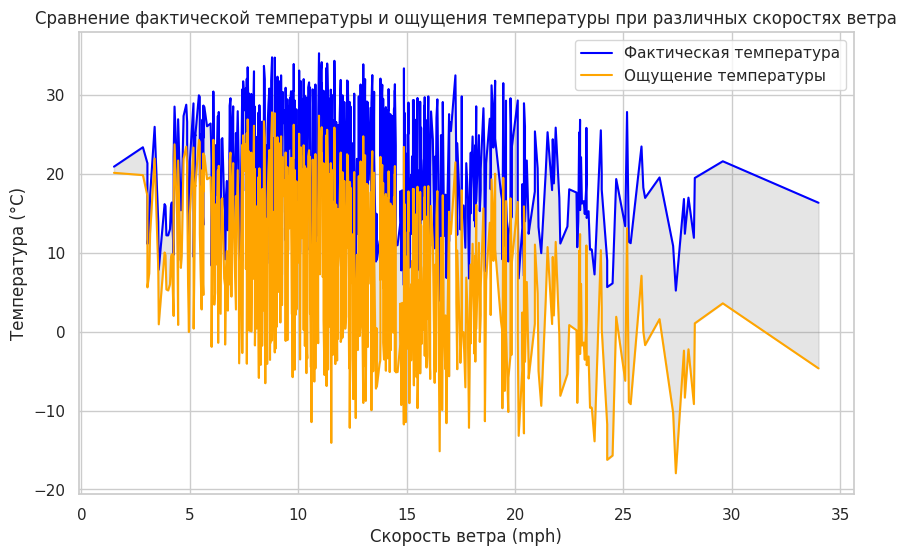

In [62]:
df['wind_chill'] = 35.74 + 0.6215 * df['temp'] - 35.75 * df['windspeed(mph)'] ** 0.16 + 0.4275 * df['temp'] * df['windspeed(mph)'] ** 0.16
df['wind_chill'] = 35.74 + 0.6215 * df['temp'] - 35.75 * df['windspeed(mph)'] ** 0.16 + 0.4275 * df['temp'] * df['windspeed(mph)'] ** 0.16
df_sorted = df.sort_values('windspeed(mph)')
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['windspeed(mph)'], df_sorted['temp'], label='Фактическая температура', color='blue')
plt.plot(df_sorted['windspeed(mph)'], df_sorted['wind_chill'], label='Ощущение температуры', color='orange')
plt.fill_between(df_sorted['windspeed(mph)'], df_sorted['temp'], df_sorted['wind_chill'], color='gray', alpha=0.2)
plt.title('Сравнение фактической температуры и ощущения температуры при различных скоростях ветра')
plt.xlabel('Скорость ветра (mph)')
plt.ylabel('Температура (°C)')
plt.legend()
plt.grid(True)
plt.show()